In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PerfParser import PerfParser
from Preprocessor import Preprocessor

In [3]:
perf_dir = "perf-report/"
stdout_dir = "stdout/valid/"
category_to_functions_path = "tags/category_to_functions.json"
tags_path = "tags/tags.json"

In [4]:
preprocessor = Preprocessor(stdout_dir="stdout/", perf_report_dir=perf_dir)
preprocessor.filter_stdout()

In [13]:
perf_parser = PerfParser(
    perf_dir=perf_dir,
    stdout_dir=stdout_dir,
    category_to_functions_path=category_to_functions_path,
    normalize=False
)

Initializing CNF Stats...:   0%|          | 0/191 [00:00<?, ?it/s]

Initializing CNF Stats...: 100%|██████████| 191/191 [00:12<00:00, 14.70it/s]

Total time: 276626.064


In [6]:
json_out = "stats/cnf_stats.json"
perf_parser.save_stats_to_json(json_out)

In [7]:
agg_json_out = "stats/unnorm_agg_cnf_stats.json"
perf_parser.save_agg_stats_to_json(agg_json_out)

In [8]:
cat_json_out = "stats/unnorm_category_stats.json"
perf_parser.save_category_stats_to_json(cat_json_out)

In [9]:
from PerfTableGenerator import PerfTableGenerator

table_generator = PerfTableGenerator(
    agg_stats_path=agg_json_out,
    category_stats_path=cat_json_out
)

In [10]:
function_table = table_generator.generate_function_table_latex()
print(function_table)

\begin{tabular}{llll}
\toprule
Function Name & Category & Total Time & Percent Time \\
\midrule
get\_and\_node & compile & 54456.28 & 19.69 \\
remove\_watched\_clause & sat & 49630.68 & 17.94 \\
set\_literal & sat & 39882.02 & 14.42 \\
construct\_vtree\_key & cache & 18230.49 & 6.59 \\
move\_watched\_literal & sat & 11543.70 & 4.17 \\
sat\_is\_subsumed\_clause & sat & 10346.47 & 3.74 \\
sat\_is\_implied\_literal & sat & 9706.83 & 3.51 \\
get\_or\_node & compile & 5038.33 & 1.82 \\
unmark\_vset & vtree & 4196.88 & 1.52 \\
mark\_vset & vtree & 4164.58 & 1.51 \\
lookup\_cache & cache & 3657.01 & 1.32 \\
erase\_level & compile & 3352.72 & 1.21 \\
compile\_dispatcher & compile & 2763.62 & 1.00 \\
vtree\_is\_shannon\_node & vtree & 2713.04 & 0.98 \\
should\_cache & cache & 2647.90 & 0.96 \\
sat\_var2pliteral & sat & 2640.65 & 0.95 \\
nnf\_node\_cmp & compile & 2408.61 & 0.87 \\
sat\_is\_instantiated\_var & sat & 2242.01 & 0.81 \\
compile\_vtree\_shannon & compile & 1965.70 & 0.71 \\
literal2

In [11]:
category_table = table_generator.generate_category_table_latex()
print(category_table)

\begin{tabular}{lll}
\toprule
Category & Total Time & Percent Time \\
\midrule
sat & 131303.73 & 53.07 \\
compile & 74669.18 & 30.18 \\
cache & 29132.93 & 11.77 \\
vtree & 11931.52 & 4.82 \\
nnf & 397.75 & 0.16 \\
\bottomrule
\end{tabular}



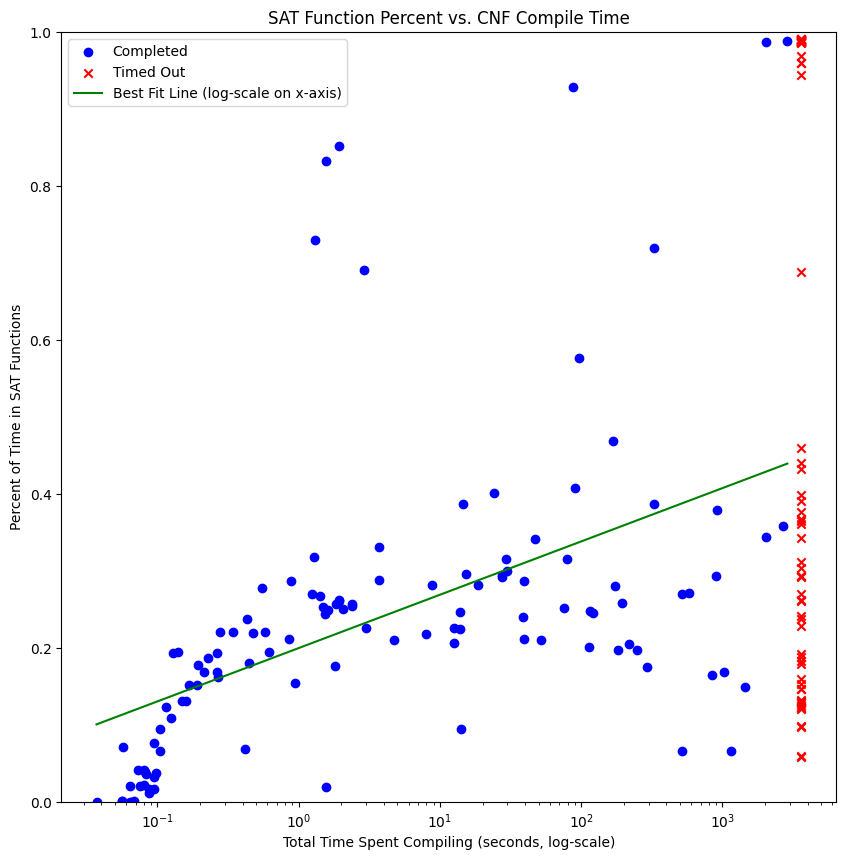

In [12]:
from SatPlotter import SatPlotter

sat_plotter = SatPlotter(cnf_stats_path=json_out)
sat_plotter.plot_sat_time_percent()